In [220]:
import numpy as np
import pandas as pd
import scipy as sp
from pandas import Series,DataFrame
from sklearn.decomposition import PCA
# Data from Kaggle
# https://www.kaggle.com/usfundamentals/us-stocks-fundamentals
indicator_file = '../data/us-stocks-fundamentals/indicators_by_company.csv'
label_file = '../data/us-stocks-fundamentals/companies.csv'
# For Visualization
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import scipy.stats as stats
np.random.seed(78)
matplotlib.style.use('ggplot')

In [206]:
num_pts = 500
data_mean = np.array([0,0])
data_cov = np.array([[1.0,0.6],[0.6,0.45]])
synth_data = np.random.multivariate_normal(data_mean,data_cov,num_pts)
synth_data.shape

(500, 2)

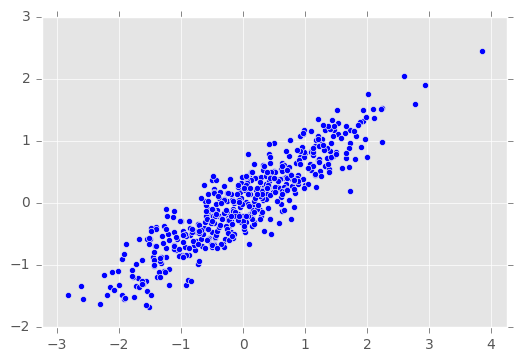

In [207]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(synth_data[:,0],synth_data[:,1])
ax.set_aspect('equal', 'datalim')

In [208]:
# Pretend we didn't know where it came from
U,s,Vh = sp.linalg.svd(synth_data)

In [209]:
U.shape

(500, 500)

In [210]:
S = sp.linalg.diagsvd(s,U.shape[0],Vh.shape[0])

In [211]:
S.shape

(500, 2)

In [212]:
reconstruct = np.dot(U,np.dot(S,Vh))
print('reconstruct[:2,:] =',reconstruct[:2,:])
print('synth_data[:2,:] =',synth_data[:2,:])
print('np.allclose(reconstruct,synth_data) = ', np.allclose(reconstruct,synth_data))

reconstruct[:2,:] = [[ -1.46708700e-01   8.87344913e-04]
 [  1.45270714e+00   7.62012886e-01]]
synth_data[:2,:] = [[ -1.46708700e-01   8.87344913e-04]
 [  1.45270714e+00   7.62012886e-01]]
np.allclose(reconstruct,synth_data) =  True


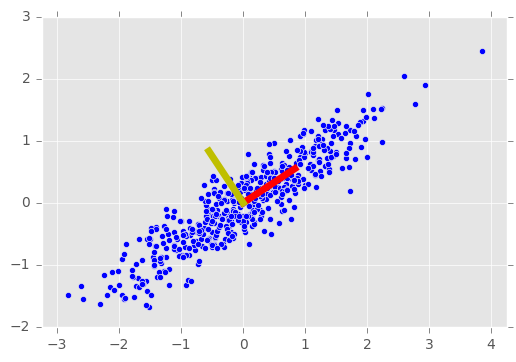

In [213]:
V = Vh.T
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(synth_data[:,0],synth_data[:,1])
ax.plot([0, V[0,0]], [0,V[1,0]], c='r', linewidth=5.0)
ax.plot([0, V[0,1]], [0,V[1,1]], c='y', linewidth=5.0)
ax.set_aspect('equal', 'datalim')

In [214]:
projected_data = np.dot(synth_data,V[:,:1])

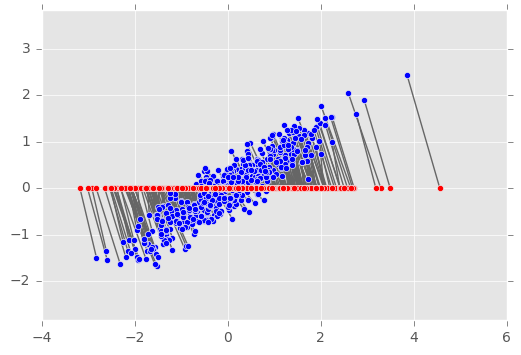

In [215]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(synth_data[:,0],synth_data[:,1],c='b',zorder=2)
ax.scatter(projected_data, np.zeros_like(projected_data),c='r',zorder=2)
for px, py, proj in zip(synth_data[:,0],synth_data[:,1],projected_data):
    ax.plot([px,proj],[py,0], c='0.4', linewidth=1.0, zorder=1)
ax.set_aspect('equal', 'datalim')

In [216]:
# Recall
# U S Vh = SD
# U S Vh Vh.T = SD Vh.T
# U S = SD Vh.T = SD V (projected data if we take part of V)
# projected_data = np.dot(synth_data,V[:,:1])
alt_projected_data = np.dot(U,S[:,:1])
print('projected_data==alt_projected_data: ',np.allclose(projected_data, alt_projected_data))

projected_data==alt_projected_data:  True


In [217]:
# This puts it back in 2D
# (U S) Vh = SD
# projected Vh = projected_SD
projected_data_in_2D = np.dot(np.dot(U,S[:,:1]),Vh[:1,:])
projected_data_in_2D.shape

(500, 2)

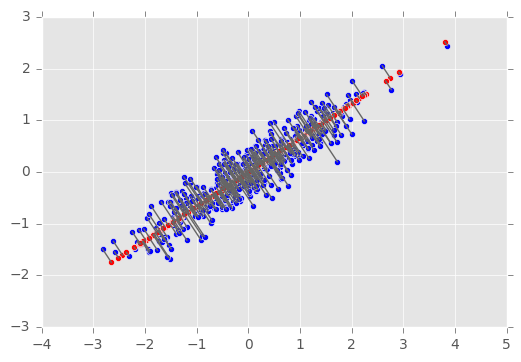

In [219]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(synth_data[:,0],synth_data[:,1],c='b',zorder=2)
ax.scatter(projected_data_in_2D[:,0], projected_data_in_2D[:,1],c='r',zorder=2)
for px, py, qx, qy in zip(synth_data[:,0],synth_data[:,1],
                        projected_data_in_2D[:,0], projected_data_in_2D[:,1]):
    ax.plot([px,qx],[py,qy], c='0.4', linewidth=1.0, zorder=3)
ax.set_aspect('equal', 'datalim')

In [222]:
pca_model = PCA(n_components=1,whiten=False)
pca_model.fit(synth_data)
pca_projected = pca_model.transform(synth_data)

In [225]:
pca_projected[:10,:].T

array([[-0.14005759,  1.61384518, -0.41791376, -0.29535032, -0.79006372,
        -2.66318083, -1.66272078,  0.58501319,  0.39240422,  0.39896436]])

In [226]:
projected_data[:10,:].T

array([[-0.12187848,  1.63203583, -0.39972243, -0.27717719, -0.77187265,
        -2.64499633, -1.64453403,  0.60318019,  0.41058807,  0.41713794]])

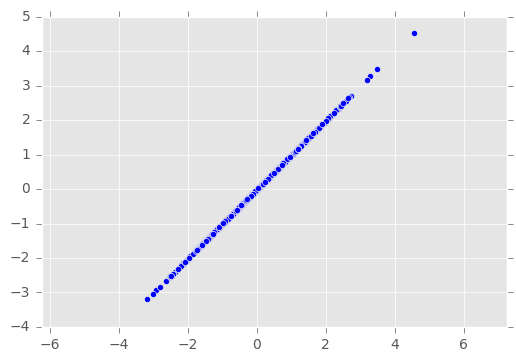

In [228]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(np.squeeze(projected_data),np.squeeze(pca_projected))
ax.set_aspect('equal', 'datalim')

In [ ]:
ind_df=pd.read_csv(indicator_file)
ind_df.head()

In [8]:
df_comp_count = ind_df[['company_id', 'indicator_id', '2015']].dropna(
).groupby('indicator_id')['company_id'].count().sort_values(ascending=False).head(20)
df_comp_count

indicator_id
LiabilitiesAndStockholdersEquity                                            6012
Assets                                                                      5997
StockholdersEquity                                                          5503
RetainedEarningsAccumulatedDeficit                                          5500
NetIncomeLoss                                                               5492
CashAndCashEquivalentsAtCarryingValue                                       5490
CashAndCashEquivalentsPeriodIncreaseDecrease                                5151
CommonStockSharesAuthorized                                                 5114
CommonStockValue                                                            4916
CommonStockSharesIssued                                                     4901
PropertyPlantAndEquipmentNet                                                4808
CommonStockParOrStatedValuePerShare                                         4763
Liabilities    

In [14]:
pop_indicators = list(df_comp_count.keys())
pop_indicators

['LiabilitiesAndStockholdersEquity',
 'Assets',
 'StockholdersEquity',
 'RetainedEarningsAccumulatedDeficit',
 'NetIncomeLoss',
 'CashAndCashEquivalentsAtCarryingValue',
 'CashAndCashEquivalentsPeriodIncreaseDecrease',
 'CommonStockSharesAuthorized',
 'CommonStockValue',
 'CommonStockSharesIssued',
 'PropertyPlantAndEquipmentNet',
 'CommonStockParOrStatedValuePerShare',
 'Liabilities',
 'IncomeTaxExpenseBenefit',
 'AssetsCurrent',
 'LiabilitiesCurrent',
 'OperatingIncomeLoss',
 'CommonStockSharesOutstanding',
 'AccumulatedDepreciationDepletionAndAmortizationPropertyPlantAndEquipment',
 'PropertyPlantAndEquipmentGross']